In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# 1. Read in data set, explore

In [4]:
# Load the processed data

df_med = pd.read_csv('med_data1.csv')

In [5]:
df_med.head(3)

,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,fav_color,Credit_card,ReAdmin,Gender,SeniorCitizen,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_Days,MonthlyCharge,TotalCharge,item1,item2,item3,item4,item5,item6,item7,item8
0,1,C412403,cd86e3b5-bccb-4c38-b406-a70859af6424,1b827d78c02cdf967d83280a316fbab7,19610,40.34008,-75.97606,Reading,PA,15439,Berks,Suburban,America/New_York,"Production assistant, radio",1,79,Regular High School Diploma,Student,83147.66,Divorced,Snow,Discover,No,Female,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,95.018175,1034.377162,0,1,0,4,1,2,2,4
1,2,Z919181,7058d104-99d4-41ae-ad17-def063f2024c,e3d31d932fe4468908664f2b054fa31c,66080,38.40441,-95.25956,Richmond,KS,922,Franklin,Urban,America/Chicago,Retail buyer,2,31,"Some College, 1 or More Years, No Degree",Full Time,54612.56,Divorced,PaleGoldenRod,Mastercard,Yes,Male,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,97.442069,1497.764653,3,4,3,3,2,4,1,3
2,3,F995323,4c1a465a-2a2b-4f38-bbe6-036fac234eaa,2644b097b08b5548313266f100a6e22c,45653,38.89156,-82.82310,Minford,OH,3782,Scioto,Urban,America/New_York,Forensic scientist,7,49,"Some College, 1 or More Years, No Degree",Student,7726.42,Married,WhiteSmoke,VISA 16 digit,Yes,Male,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,82.496547,395.125825,3,1,2,3,2,2,3,4


In [6]:
#df_med.describe()
#df_med.dtypes

In [7]:
# Define features and target variables

X = df_med.drop('ReAdmin',axis=1)   #Feature Matrix
Y = df_med['ReAdmin']          #Target Variable

# Print dimensions
print(X.shape)
print(Y.shape)

(10000, 49)
(10000,)


# 2. Feature Engineering

## Variable transformation 

In [8]:
# Transform Y to 0/1

Y = pd.Series(np.where(Y.values=='Yes',1,0))

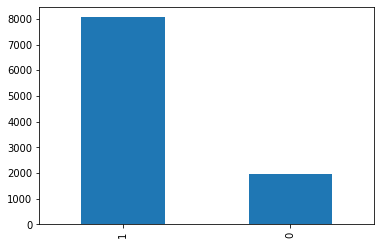

In [9]:
# Percent counts of Y
Y.value_counts().plot(kind='bar')

In [10]:
# transform zip to categorical

X['zip']= X['zip'].astype('str')

## Variable selection

### Continuous variables

In [12]:
# Cont cols (normalize for KNN)

# Continuous cols (normalize-for KNN)
cols_cont = ['Population', 'Children', 'Lat', 'Lng', 'Income', 'Age', 'Initial_Days', 'TotalCharge'] #leave out monthlycharge
X_cont = X[cols_cont]
X_cont.head(3)

,Population,Children,Lat,Lng,Income,Age,Initial_Days,TotalCharge
0,15439,1,40.34008,-75.97606,83147.66,79,10.585770,1034.377162
1,922,2,38.40441,-95.25956,54612.56,31,15.129562,1497.764653
2,3782,7,38.89156,-82.82310,7726.42,49,4.772177,395.125825


### Categorical variables

In [13]:
# Cat cols-full list

cols_cat_all = X.loc[:, X.dtypes == np.object].columns.values.tolist() #have to translate back to list format
cols_cat_all = cols_cat_all[3:] #remove the first three cols, related to cust ID


In [14]:
# Cat cols-only those with limited tot unique value (otherwise too many categories created for dummies)

t = X[cols_cat_all].nunique().sort_values(ascending=False)
t = t.loc[lambda t: t < 20]  # change value to what is desired here, from 20
cols_cat_all_red = t.index.values.tolist()
X[cols_cat_all_red].nunique().to_frame('tot unique') #updated reduced list 


,tot unique
Education,12
Credit_card,10
Employment,5
Marital,5
Services,4
Initial_Admin,3
Complication_Risk,3
Area,3
HighBlood,2
Asthma,2


In [15]:
# 1. Create dummies-for categorical cols (use reduced col list)

X_cat = pd.get_dummies(X[cols_cat_all_red], drop_first=True) # drop first as it is redundant
print('number of cat cols chosen: ', X[cols_cat_all_red].shape[1])
print('total cat cols after one hot encoding: ', X_cat.shape[1])
X_cat.head(3)

number of cat cols chosen:  21
total cat cols after one hot encoding:  50


,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Services_CT Scan,Services_Intravenous,Services_MRI,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,Complication_Risk_Low,Complication_Risk_Medium,Area_Suburban,Area_Urban,HighBlood_Yes,Asthma_Yes,Gender_Male,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,SeniorCitizen_Yes
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0


In [16]:
# 2. For Naive Bayes, choose all cat columns and label encode 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_cat_nb = X[cols_cat_all].apply(le.fit_transform)
print('number of cat cols in NB: ', X[cols_cat_all].shape[1])
print('total cat cols in NB after one hot encoding: ', X_cat_nb.shape[1])
X_cat_nb.head(3) 

number of cat cols in NB:  28
total cat cols in NB after one hot encoding:  28


,zip,City,State,County,Area,Timezone,Job,Education,Employment,Marital,fav_color,Credit_card,Gender,SeniorCitizen,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,988,4505,38,122,1,15,459,9,3,0,126,2,0,0,1,1,0,2,0,1,1,0,1,1,1,0,1,0
1,5768,4564,16,524,2,2,514,10,0,0,102,6,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,2
2,3471,3490,35,1313,2,15,259,10,3,1,137,8,1,0,0,1,0,2,1,0,1,0,0,0,0,0,0,0


In [17]:
# Join Cat and Noncat together

X_all = pd.concat([X_cont, X_cat],axis=1)
X_all_nb = pd.concat([X_cont, X_cat_nb],axis=1)

print('total cols for final df: ', X_all.shape[1]) 
print('total cols for final df, Naive Bayes: ',X_all_nb.shape[1])
X_all_nb.head()

total cols for final df:  58
total cols for final df, Naive Bayes:  36


,Population,Children,Lat,Lng,Income,Age,Initial_Days,TotalCharge,zip,City,State,County,Area,Timezone,Job,Education,Employment,Marital,fav_color,Credit_card,Gender,SeniorCitizen,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,15439,1,40.34008,-75.97606,83147.66,79,10.585770,1034.377162,988,4505,38,122,1,15,459,9,3,0,126,2,0,0,1,1,0,2,0,1,1,0,1,1,1,0,1,0
1,922,2,38.40441,-95.25956,54612.56,31,15.129562,1497.764653,5768,4564,16,524,2,2,514,10,0,0,102,6,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,2
2,3782,7,38.89156,-82.82310,7726.42,49,4.772177,395.125825,3471,3490,35,1313,2,15,259,10,3,1,137,8,1,0,0,1,0,2,1,0,1,0,0,0,0,0,0,0
3,1115,0,39.88561,-90.39943,57779.93,31,1.714879,114.424164,5373,164,14,239,0,2,506,10,3,2,55,9,0,0,0,0,1,2,0,1,0,0,0,0,0,1,1,0
4,17445,0,40.63710,-103.23146,70179.69,50,1.254807,95.720457,7302,5211,5,854,1,3,550,7,0,1,9,2,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1


# Train/Test Split Data

In [18]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_all, Y,
    test_size=0.3,
    random_state=1
)

# for Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_all_nb, Y,
    test_size=0.3,
    random_state=1
)

In [19]:
# Print dimensions

print('Train cols: ', X_train.shape[1])
print('Test cols: ', X_test.shape[1])
print('Train cols, NB: ', X_train_nb.shape[1])
print('Test cols, NB: ', X_test_nb.shape[1])

Train cols:  58
Test cols:  58
Train cols, NB:  36
Test cols, NB:  36


# Predictive Modeling Techniques

# 1. KNN

This section covers KNN

In [20]:
# Load the K-Nearest Neighbors class
from sklearn.neighbors import KNeighborsClassifier

# Load the metrics libraries (used for all methods)
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, classification_report

In [21]:
# Scale the data for cols_cont 

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() #MinMaxScaler()

X_train_std = X_train.copy() #copy train features df for KNN
X_test_std = X_test.copy()  #copy test features df for KNN
#transform cont cols only
X_train_std[cols_cont] = scaler.fit_transform(X_train_std[cols_cont]) 
X_test_std[cols_cont] = scaler.transform(X_test_std[cols_cont])

X_train_std.head(3)

,Population,Children,Lat,Lng,Income,Age,Initial_Days,TotalCharge,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Services_CT Scan,Services_Intravenous,Services_MRI,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,Complication_Risk_Low,Complication_Risk_Medium,Area_Suburban,Area_Urban,HighBlood_Yes,Asthma_Yes,Gender_Male,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,SeniorCitizen_Yes
2228,-0.072058,1.320128,-0.912823,-0.197392,-1.194997,1.092357,-1.010361,-1.010111,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,1
5910,0.822813,0.395900,-0.461530,-1.631181,-0.561450,1.236218,1.123644,1.052497,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,1,0,0
1950,-0.574062,0.395900,0.450261,0.120702,-0.864709,1.188264,-0.911589,-0.920343,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1


In [22]:
# Train a K-Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_std, y_train) #Note: only X_train is std (not y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [23]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = knn.predict(X_test_std)
y_prob = knn.predict_proba(X_test_std)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))
#confusion_matrix(y_test, y_pred)


total accuracy = 76.8%
total precision = 82.8%
total recall = 89.5%
auc = 0.67%


# 2. Naive Bayes

This section covers Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
nb = model.fit(X_train_nb,y_train_nb)

In [25]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = nb.predict(X_test_nb)
y_prob = nb.predict_proba(X_test_nb)[:, 1]

acc = accuracy_score(y_test_nb, y_pred)*100
precision = precision_score(y_test_nb, y_pred)*100
recall = recall_score(y_test_nb, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test_nb, y_prob)
print('auc = {:.2f}%'.format(auc))
#confusion_matrix(y_test, y_pred)

total accuracy = 74.9%
total precision = 87.5%
total recall = 79.9%
auc = 0.75%


# 3. Decision Tree

This section covers Decision Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Train a Random Forest

tree = DecisionTreeClassifier(max_depth=5)

tree.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))
#confusion_matrix(y_test, y_pred)

total accuracy = 80.8%
total precision = 84.3%
total recall = 93.3%
auc = 0.76%


# 4. Random Forest 

This section covers Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Train a Random Forest

forest = RandomForestClassifier(
    n_estimators=100,
    max_features=15,
    max_depth=5,
    random_state=1,
)
forest.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [32]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = forest.predict(X_test)
y_prob = forest.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))
#confusion_matrix(y_test, y_pred)

total accuracy = 80.7%
total precision = 80.8%
total recall = 99.4%
auc = 0.78%


## Feature Importance for Random Forest

In [33]:
feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp[:10]

Complication_Risk_Medium    0.268935
TotalCharge                 0.264615
Initial_Days                0.237803
HighBlood_Yes               0.066909
Lng                         0.020170
Income                      0.019983
Population                  0.018786
Lat                         0.017857
Complication_Risk_Low       0.013465
Age                         0.011909
dtype: float64

No handles with labels found to put in legend.


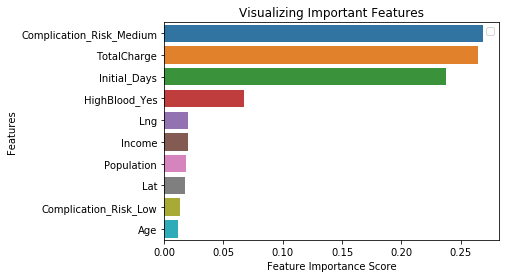

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# 4. Gradient Boosting
This section covers Gradient Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

## AdaBoost

In [36]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [37]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = ada.predict(X_test)
y_prob = ada.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))

total accuracy = 81.0%
total precision = 83.7%
total recall = 94.5%
auc = 0.78%


## Gradient boost

In [38]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [39]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = gb.predict(X_test)
y_prob = gb.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))

total accuracy = 81.8%
total precision = 83.8%
total recall = 95.6%
auc = 0.79%


In [40]:
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=.02, max_features=15, max_depth=5, random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=5,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = gb.predict(X_test)
y_prob = gb.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))

total accuracy = 81.0%
total precision = 81.4%
total recall = 98.7%
auc = 0.78%
